<a href="https://colab.research.google.com/github/rghimre3/BCIS-5110-Programming-for-Business-Analytics/blob/main/Group_Project_BCIS_5110_(Summer_2%2C_2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Group Name : Group 1

**Contributors**
1. Ramesh Ghimire
2. Avinash Goud Vanga
3. Garnet Cameron
4. Jose Martinez
5. Rachel Campaneria

# Project Description

In this assignment, you will work with a dataset consisting of at least 1000 rows and 15 columns, containing 5 to 10 percent missing values. The objective is to practice your Python coding skills while performing data analysis tasks on the given dataset. Formulate ten research questions based on the dataset. These questions should require data analysis and provide meaningful insights into the dataset. You will be working in groups, and each group is required to submit a Python code file that addresses the following topics:

Data exploration: Cleanup, Question 7

Write code to display the shape of the dataset (number of rows and columns).
Identify and handle missing values using an appropriate imputation technique.

Conditional statements: Question 1, 6

Implement a code segment that utilizes conditional statements to filter, select, or transform data based on specific conditions.

Loop implementation: Question 1 , 6, Cleanup

Write two code implementations that utilize loops to iterate over the dataset, performing a specific task or calculation. One of the implementations should include the use of the break or continue statement.

Function definitions: Question 8, Cleanup

Define at least two functions that operate on the dataset. One of the functions should utilize keyword arguments for flexible parameter passing.

Data visualization: Question 9 , 8, 4

Implement at least one code segment that focuses on data visualization using a suitable library such as Matplotlib or Seaborn. Generate visualizations to represent patterns, trends, or relationships in the dataset.

Numpy functions:

Include at least one code segment that demonstrates the use of Numpy functions for numerical calculations or manipulations on the dataset.

Pandas functions: Cleanup

Incorporate at least one code segment that showcases the use of Pandas functions for data manipulation, analysis, or aggregation on the dataset.

Important notes:

Your Python code file should be well-commented, organized, and easy to understand. Additionally, provide clear explanations of the code segments and the insights gained from the data analysis.

The dataset used for this assignment can be selected based on your area of interest or a provided dataset related to a specific domain.

# Research Questions

1. Any repeated SubjectIDs?

2. What is the highest clinical feature range and name?

3. What is the gender composition?

4. Are men or women more likely to have higher ALSFRS?

5. Is there a correlation between creatinine levels and albumin levels?

6. How many patients have their platelet levels less than 150?

7. Are there any missing values in the dataset for patients?

8. Patients Age analysis - maximum/Min age for the patient, the average age of our patient list.

9. Glucose analysis vs diastolic blood pressure.

10. Find the mean arterial pressure (MAP = DP + 1/3(SP – DP))
Mean Arterial Pressure (MAP):
MAP = Diastolic Blood Pressure + 1/3 * (Systolic Blood Pressure - Diastolic Blood Pressure)
Attributes used: bp_diastolic_max, bp_diastolic_min, bp_systolic_max, bp_systolic_mi

11. Is there a relationship between age and ALSFRS?

12. Compare the distribution of ALSFRS scores among different age groups (e.g., young adults, middle-aged, elderly).




# Code

In [15]:

# This removes warning generated by python interpretor
import warnings
warnings.filterwarnings('ignore')
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Define Functions

In [16]:
def clean_blank_columns(df_work, ratio):
  '''
  Removes columns from df_work that contain less than ratio quantity of values.
    ratio = (count of non-Null) / (length of dataset)
  '''
  #create dataframe of NaN counts
  colMinusOne = pd.DataFrame(df_work.isnull().sum())
  #print(colMinusOne)
  #print(colMinusOne.head())
  #print(list(colMinusOne))

  # determine dataset row quantity
  dfWork_shape = df_work.shape
  dfWork_rows = dfWork_shape[0]
  print("================ ", dfWork_shape[1], " columns in dataset")

  #append ratio of Nulls
  colMinusOneRatios = colMinusOne.assign(Ratio=lambda x: abs(x/dfWork_rows))
  #print(colMinusOneRatios)

  print("\nThreshold is: ", ratio, '\n')
  for i in colMinusOneRatios.index:
    print(i)
    if colMinusOneRatios.loc[i]['Ratio'] > ratio:
        print(f'Dropping {i}, Ratio = ', colMinusOneRatios.loc[i,'Ratio'])
        df_work = df_work.drop([i], axis=1)
  print(df_work.shape)

  return df_work

## Import Data

In [17]:
# Data Import
# FIXME
df1 = pd.read_csv("https://raw.githubusercontent.com/rghimre3/BCIS-5110-Programming-for-Business-Analytics/main/ALS_TrainingData_2223.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/rghimre3/BCIS-5110-Programming-for-Business-Analytics/main/ALS_TestingData_78.csv")

df3 = pd.concat([df1,df2])


## Clean Data

In [18]:
# Check for Nulls
df3.isnull().sum()

ID                                  0
Age_mean                            0
Albumin_max                         0
Albumin_median                      0
Albumin_min                         0
                                 ... 
Urine.Ph_range                   2223
White.Blood.Cell..WBC._max       2223
White.Blood.Cell..WBC._median    2223
White.Blood.Cell..WBC._min       2223
White.Blood.Cell..WBC._range     2223
Length: 131, dtype: int64

In [19]:
# Remove mostly Null columns (> 0.5 empty) and check result
df3 = clean_blank_columns(df3, 0)
df3.isnull().sum().sum()

================  131  columns in dataset

Threshold is:  0 

ID
Age_mean
Albumin_max
Albumin_median
Albumin_min
Albumin_range
ALSFRS_slope
ALSFRS_Total_max
ALSFRS_Total_median
ALSFRS_Total_min
ALSFRS_Total_range
ALT.SGPT._max
ALT.SGPT._median
ALT.SGPT._min
ALT.SGPT._range
AST.SGOT._max
AST.SGOT._median
AST.SGOT._min
AST.SGOT._range
Bicarbonate_max
Bicarbonate_median
Bicarbonate_min
Bicarbonate_range
Blood.Urea.Nitrogen..BUN._max
Blood.Urea.Nitrogen..BUN._median
Blood.Urea.Nitrogen..BUN._min
Blood.Urea.Nitrogen..BUN._range
bp_diastolic_max
bp_diastolic_median
bp_diastolic_min
bp_diastolic_range
bp_systolic_max
bp_systolic_median
bp_systolic_min
bp_systolic_range
Calcium_max
Calcium_median
Calcium_min
Calcium_range
Chloride_max
Chloride_median
Chloride_min
Chloride_range
Creatinine_max
Creatinine_median
Creatinine_min
Creatinine_range
Gender_mean
Glucose_max
Glucose_median
Glucose_min
Glucose_range
hands_max
hands_median
hands_min
hands_range
Hematocrit_max
Hematocrit_median
Hematocrit_

0

## EDA

### Overview

In [20]:
print(df3.head(5))

   ID  Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0   1      65.0         57.0            40.5         38.0       0.066202   
1   2      48.0         45.0            41.0         39.0       0.010453   
2   3      38.0         50.0            47.0         45.0       0.008929   
3   4      63.0         47.0            44.0         41.0       0.012111   
4   5      63.0         47.0            45.5         42.0       0.008292   

   ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  ...  \
0     -0.965608                30                 28.0                22  ...   
1     -0.921717                37                 33.0                21  ...   
2     -0.914787                24                 14.0                10  ...   
3     -0.598361                30                 29.0                24  ...   
4     -0.444039                32                 27.5                20  ...   

   Sodium_min  Sodium_range  SubjectID  trunk_max  trunk

In [21]:
print(df3.shape)

(2301, 101)


In [22]:
# Summary statistics
print(df3.describe())

                ID     Age_mean  Albumin_max  Albumin_median  Albumin_min  \
count  2301.000000  2301.000000  2301.000000     2301.000000  2301.000000   
mean   1175.441547    54.600171    46.951651       43.892221    40.703429   
std     716.424659    11.368780     3.243084        2.689050     3.239233   
min       1.000000    18.000000    37.000000       34.500000    24.000000   
25%     552.000000    47.000000    45.000000       42.000000    39.000000   
50%    1172.000000    55.000000    47.000000       44.000000    41.000000   
75%    1790.000000    63.000000    49.000000       46.000000    43.000000   
max    2424.000000    81.000000    70.300000       51.100000    49.000000   

       Albumin_range  ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  \
count    2301.000000   2301.000000       2301.000000          2301.000000   
mean        0.013880     -0.731582         31.628422            26.916449   
std         0.009733      0.623373          5.352419             6.799592  

In [23]:
# View dataset column labels
list(df3)

['ID',
 'Age_mean',
 'Albumin_max',
 'Albumin_median',
 'Albumin_min',
 'Albumin_range',
 'ALSFRS_slope',
 'ALSFRS_Total_max',
 'ALSFRS_Total_median',
 'ALSFRS_Total_min',
 'ALSFRS_Total_range',
 'ALT.SGPT._max',
 'ALT.SGPT._median',
 'ALT.SGPT._min',
 'ALT.SGPT._range',
 'AST.SGOT._max',
 'AST.SGOT._median',
 'AST.SGOT._min',
 'AST.SGOT._range',
 'Bicarbonate_max',
 'Bicarbonate_median',
 'Bicarbonate_min',
 'Bicarbonate_range',
 'Blood.Urea.Nitrogen..BUN._max',
 'Blood.Urea.Nitrogen..BUN._median',
 'Blood.Urea.Nitrogen..BUN._min',
 'Blood.Urea.Nitrogen..BUN._range',
 'bp_diastolic_max',
 'bp_diastolic_median',
 'bp_diastolic_min',
 'bp_diastolic_range',
 'bp_systolic_max',
 'bp_systolic_median',
 'bp_systolic_min',
 'bp_systolic_range',
 'Calcium_max',
 'Calcium_median',
 'Calcium_min',
 'Calcium_range',
 'Chloride_max',
 'Chloride_median',
 'Chloride_min',
 'Chloride_range',
 'Creatinine_max',
 'Creatinine_median',
 'Creatinine_min',
 'Creatinine_range',
 'Gender_mean',
 'Glucose_ma

### **Answers**

### Question 1

In [24]:

print (len(df3))
print (len(set(df3['SubjectID'])))

# Brut Force
print('Brut force scan begun')
for i in df3['SubjectID']:
  j_count = 0
  for j in df3['SubjectID']:
    if i == j:
      j_count +=1
      if j_count > 1:
        print(f'Found repeated SubjectID: {i}!!')
        break
    else:
      continue
print('SubjectID scan done')

2301
2301
Brut force scan begun
SubjectID scan done


### Question 2

                            feature     value
2                   ALT.SGPT._range  2.383117
3                   AST.SGOT._range  1.916667
6                bp_diastolic_range  0.714286
10                 Creatinine_range  0.665227
14                 Hemoglobin_range  0.561798
18                      pulse_range  0.500000
7                 bp_systolic_range  0.404624
0                     Albumin_range  0.243902
4                 Bicarbonate_range  0.214286
9                    Chloride_range  0.214286
13                 Hematocrit_range  0.185714
20                     Sodium_range  0.142857
1                ALSFRS_Total_range  0.117647
17                  Potassium_range  0.098674
11                    Glucose_range  0.097463
5   Blood.Urea.Nitrogen..BUN._range  0.069543
12                      hands_range  0.042857
15                        leg_range  0.042017
21                      trunk_range  0.042017
16                      mouth_range  0.036765
19                respiratory_rang

<Axes: xlabel='value', ylabel='feature'>

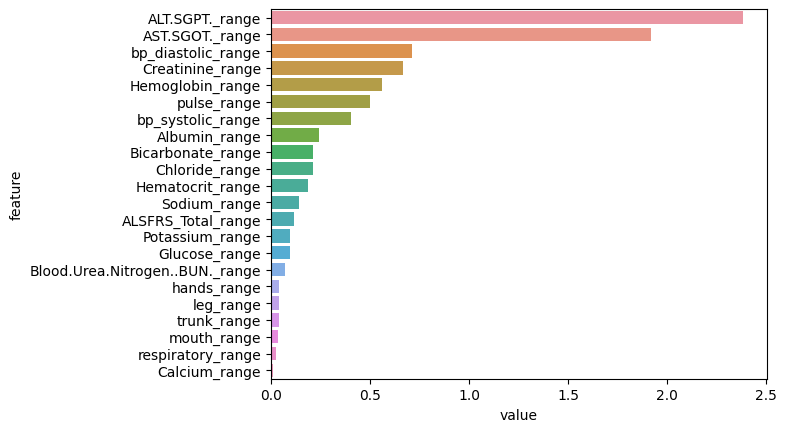

In [25]:
# Get array of original column labels
col_labels_array = np.array(list(df3))
#print(col_labels_array)

# Generate df of *_range column labels
col_range_df = []
for i in col_labels_array:
  #print(i)
  #print (i[-5:])
  if i[-5:] == "range":
    col_range_df.append(i)
    #print('****************appending', i)
#print(col_range_df)
col_range_array = np.array(col_range_df)
#print(col_range_array)

# Generate maximum of *_range df
max_range_df = df3[list(col_range_df)].max()
#print(max_range_df)
max_range_vals_array = np.array(max_range_df)
#print(max_range_vals_array)

# Create list of [label, max] pairs
label_max_pairs_list = []
for j in range(len(col_range_array)):
  label_max_pairs_list.append([col_range_array[j], max_range_vals_array[j]])
#print(label_max_pairs_list)

# Create df
label_max_pairs_df = pd.DataFrame(label_max_pairs_list, columns=['feature', 'value'])
#print(label_max_pairs_df)
label_max_pairs_sorted_df = label_max_pairs_df.sort_values('value', ascending=False)
print(label_max_pairs_sorted_df)

# Visualize max range values
sns.barplot(x='value', y='feature', data=label_max_pairs_sorted_df)


### Question 3

count    2301.000000
mean        1.636680
std         0.481061
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: Gender_mean, dtype: float64
Males = 1465
Females = 836


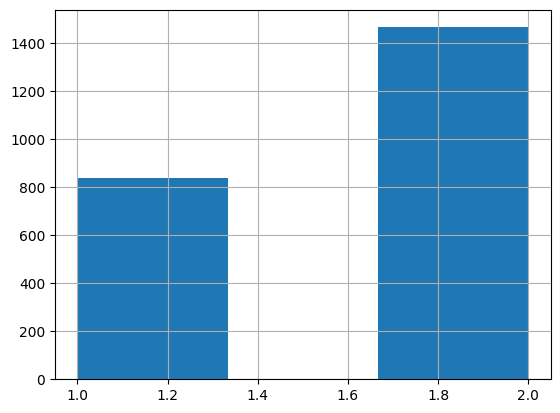

In [26]:

# Assuming Male = 2, Female = 1
df3Gender = df3['Gender_mean']

# print(df3Gender)
print(df3Gender.describe())
df3Gender.hist(bins=3)
malesCount = 0
femalesCount = 0
for i in df3Gender:
  if df3Gender.iloc[i] == 2:
    malesCount += 1
for i in df3Gender:
  if df3Gender.iloc[i] == 1:
    femalesCount += 1
print(f'Males = {malesCount}')
print(f'Females = {femalesCount}')

#### Question 4

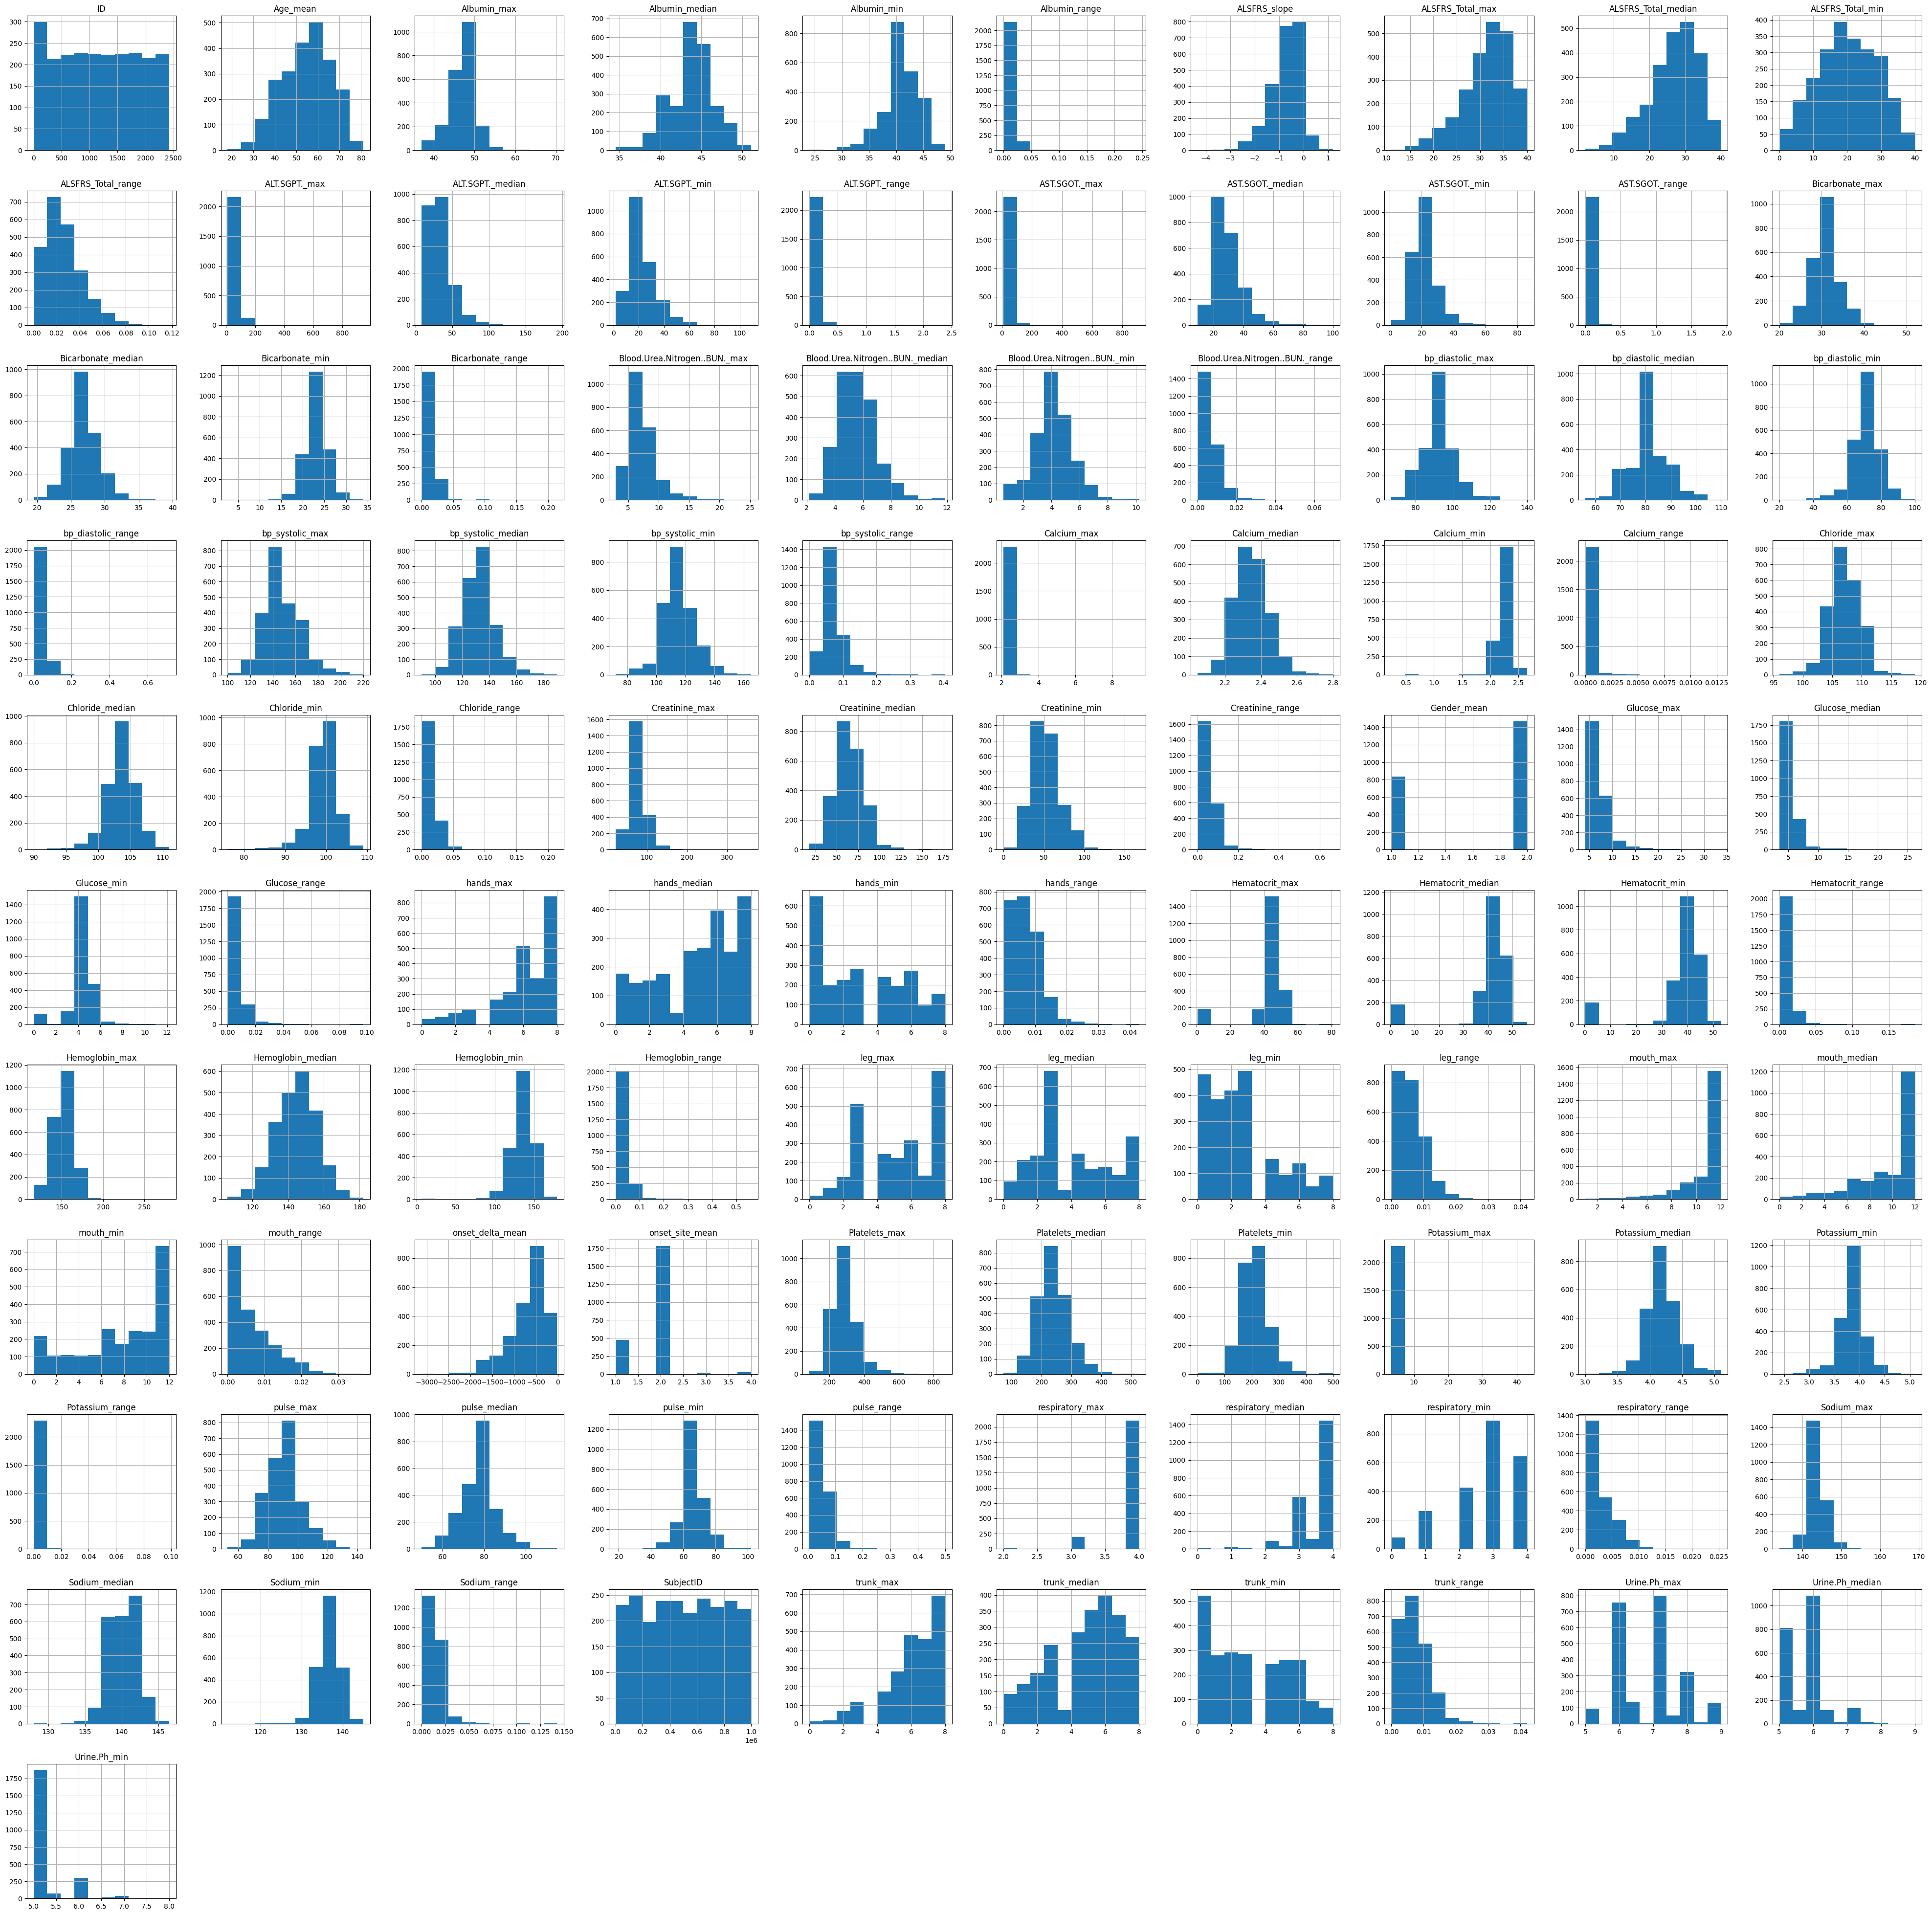

In [27]:
# the below fig privdes the data distribution. skewness and outliers
hist1=df3.hist(figsize=(50,50))

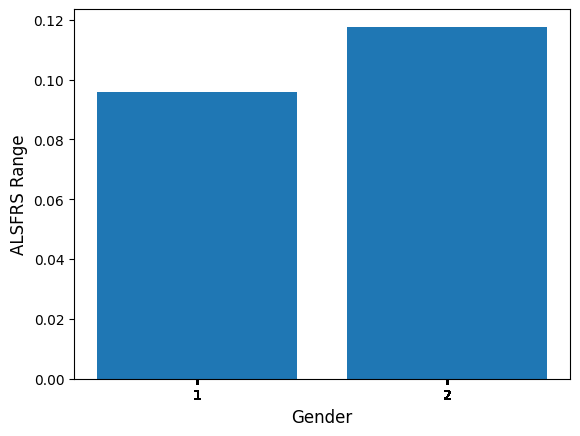

In [28]:
# This problem helps identify the ALSFRS score to see if men or women would have more function retained.

# Define the axis: X -- (1 = Female, 2 = Male)  Y -- ALSFRS Total Median
x, y = df3Gender, df3.ALSFRS_Total_range

# Graph the Male and Female ALSFRS Range
plt.bar(x,y)
plt.ylabel('ALSFRS Range', fontsize = 12)
plt.xlabel("Gender", fontsize = 12)
plt.xticks(ticks = x)
plt.show()

### Question 5

<Axes: xlabel='Creatinine_range', ylabel='Albumin_range'>

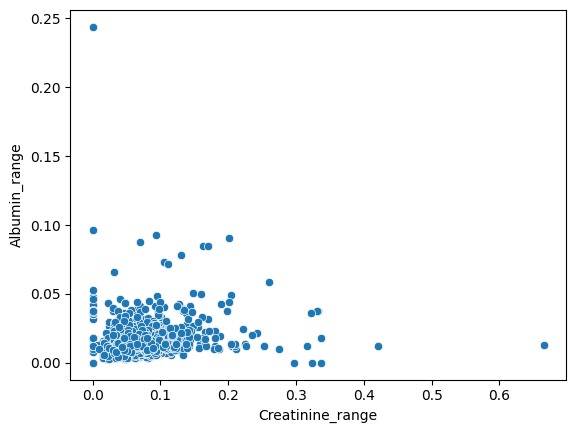

In [29]:
# By performing a Scatterplot we can distinguish that there is a correlation between the Creatinine and Albumin levels.

#Create a scatterplot with x and y vlaues
sns.scatterplot(df3, x = 'Creatinine_range',y = 'Albumin_range')


### Question 6

In [30]:
# This problem helps show that 56 patients have Platelet levels that are less than 150. Having low platelet levels is a sign of ALS.

#initializing the list of Platelet Levels
Platelets_level = df3.Platelets_median

#count the platelet levels that are less than 150
count = 0
for i in Platelets_level:
  if i < 150:
    count = count + 1

print("There are " + str(count), "patients that have platelet levels less than 150.")

There are 56 patients that have platelet levels less than 150.


#### Question 7

In [31]:
# Handled in clean_blank_columns(df3, 0) call of the Clean Data section. Ratio=0 removed all columns with any Null.

### Question 8

The Mean age for these patients is: 54.60017145612777
The Maximum age for these patients is: 81.0
The Minimum age for these patients is: 18.0


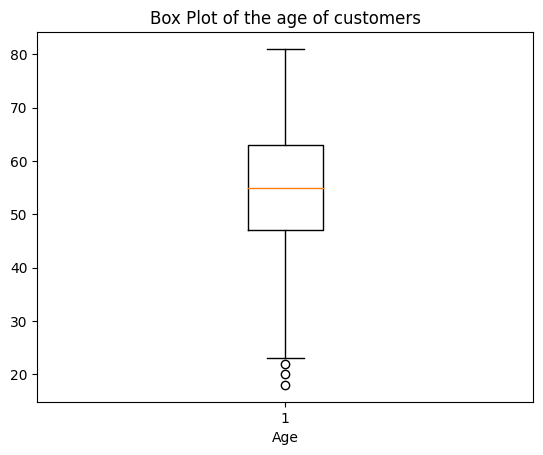

In [32]:
#Age Analysis for the ALS dataset
Mean_age = df3['Age_mean'].mean()
print("The Mean age for these patients is:",Mean_age)
Max_age = df3['Age_mean'].max()
print("The Maximum age for these patients is:",Max_age)
Min_age = df3['Age_mean'].min()
print("The Minimum age for these patients is:",Min_age)

import matplotlib.pyplot as plt
data = df3

#create a box plot for the 'Age_mean' Column
plt.boxplot(data['Age_mean'])

# adding lables and titles
plt.xlabel('Age')
#plt.ylabel('Number of Homes Sold')
plt.title('Box Plot of the age of customers')

#shoes the plot from above
plt.show()


### Question 9

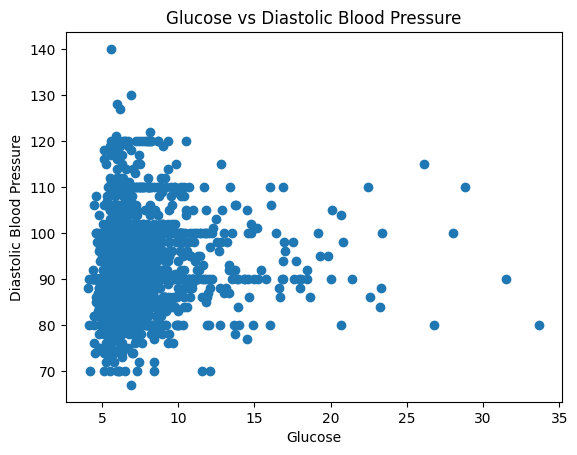

In [33]:

import matplotlib.pyplot as plt

# point to the data
data = df3

# Extract the relevant columns from the dataset Df3
glucose = data['Glucose_max']
diastolic_bp = data['bp_diastolic_max']

# Create the scatter plot
plt.scatter(glucose, diastolic_bp)

# Add labels and title
plt.xlabel('Glucose')
plt.ylabel('Diastolic Blood Pressure')
plt.title('Glucose vs Diastolic Blood Pressure')

# Show the plot
plt.show()


### Question 10

In [34]:


def calculate_MAP(bp_diastolic_max, bp_diastolic_min, bp_systolic_max, bp_systolic_min):
    # Calculate the average diastolic blood pressure
    DP = (bp_diastolic_max + bp_diastolic_min) / 2

    # Calculate the average systolic blood pressure
    SP = (bp_systolic_max + bp_systolic_min) / 2

    # Calculate the Mean Arterial Pressure (MAP)
    MAP = DP + (1/3) * (SP - DP)

    # Return the result
    return MAP

# Assign values to the variables from the data
bp_diastolic_max = data['bp_diastolic_max'].max()
bp_diastolic_min = data['bp_diastolic_min'].min()
bp_systolic_max = data['bp_systolic_max'].max()
bp_systolic_min = data['bp_systolic_min'].min()

# Call the function to calculate the MAP
MAP = calculate_MAP(bp_diastolic_max, bp_diastolic_min, bp_systolic_max, bp_systolic_min)

# Print the result
print("The Mean Arterial Pressure (MAP) is:", MAP)

The Mean Arterial Pressure (MAP) is: 102.0


### Question 11

Correlation Coefficient between Age and ALSFRS: 0.04886380150028439


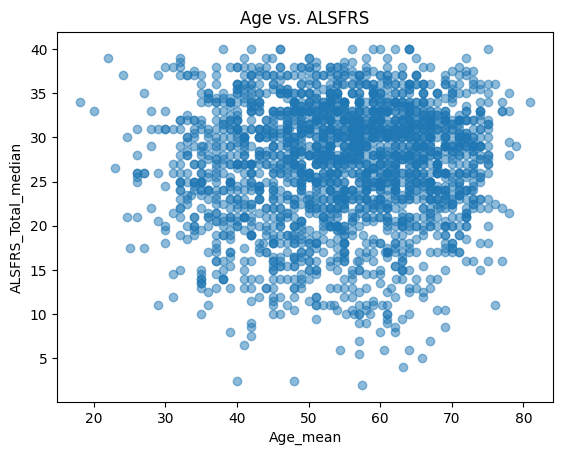

In [35]:
# Extract the relevant columns for analysis
age_column = df3['Age_mean']
alsfrs_column = df3['ALSFRS_Total_median']

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(age_column, alsfrs_column)[0, 1]

# Print the correlation coefficient
print(f"Correlation Coefficient between Age and ALSFRS: {correlation_coefficient}")

# Create a scatter plot
plt.scatter(age_column, alsfrs_column, alpha=0.5)

# Add labels and title
plt.xlabel('Age_mean')
plt.ylabel('ALSFRS_Total_median')
plt.title('Age vs. ALSFRS')
plt.show()

### Question 12

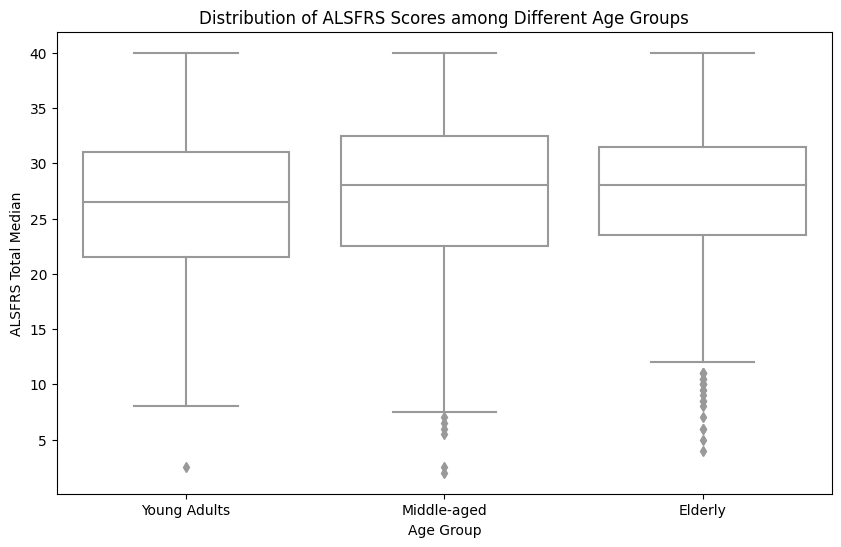

In [36]:
# Define age group categories and bins
age_groups = ['Young Adults', 'Middle-aged', 'Elderly']
age_bins = [18, 40, 60, 100]

# Categorize the 'Age_mean' column into different age groups
df3['Age_Group'] = pd.cut(df3['Age_mean'], bins=age_bins, labels=age_groups)

# Create box plots to compare the distribution of ALSFRS scores among different age groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='ALSFRS_Total_median', data=data, color='white')
plt.xlabel('Age Group')
plt.ylabel('ALSFRS Total Median')
plt.title('Distribution of ALSFRS Scores among Different Age Groups')
plt.show()

## Conclusion

The AlS data is pretty interetsing. The EDa showed that data is fairly clean. the data itself is too wide.  The barcharts the relationship bwtween variables
